In [159]:
import os 
import sys
while os.path.split(os.getcwd())[1] != 'RecSysChallenge2023-Team':
    os.chdir('..')
sys.path.insert(1, os.getcwd())

In [160]:
import re
import json

file_path = "/Users/daniele/Desktop/explicit_matrix_SSLIMElatic.txt"

In [161]:
misure = []

with open(file_path) as f:
    text = f.readlines()

    for string in text:
        if re.match("^SearchBayesianSkopt: Config \d+",string):
            m = re.search("\d+",string)
            index = int(m.group(0))
            m = re.search("{.*}",string)
            config = json.loads(m.group(0).replace('\'','"'))
            m = re.search('MAP: ([0-9]*[.][0-9]*)',string)
            map= float(m.group(1))
            misure.append([index,config,map])

topK
l1_ratio
alpha
workers


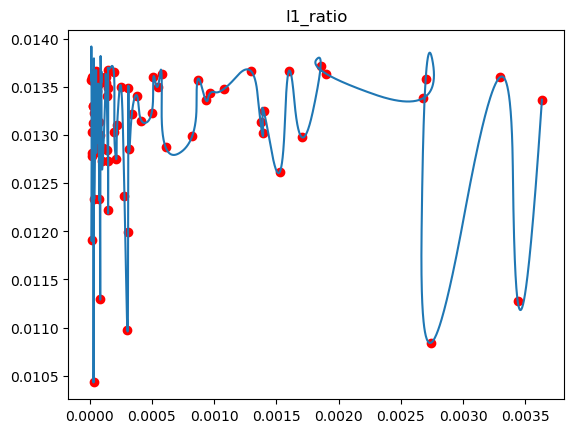

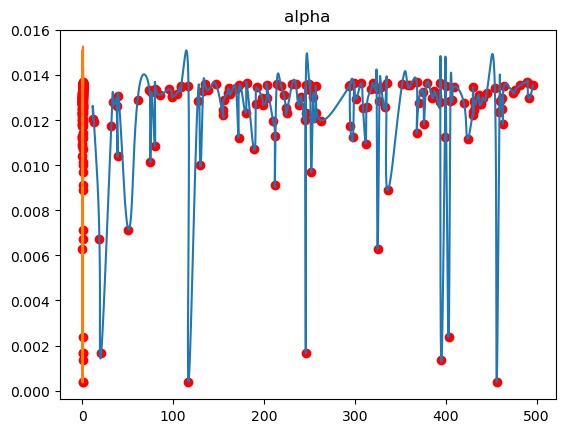

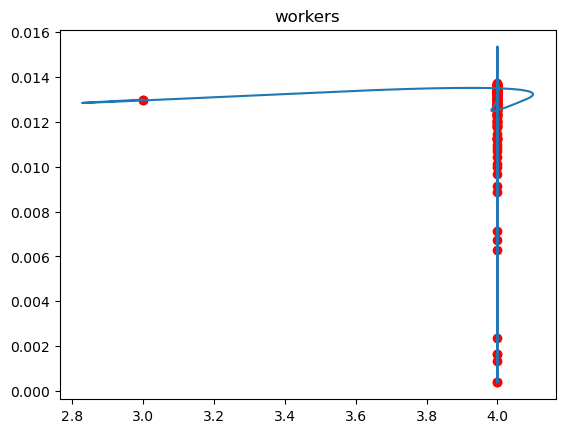

<Figure size 640x480 with 0 Axes>

In [165]:
import matplotlib.pyplot as pyplot
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import scipy 
%matplotlib inline 

i=0
for key in misure[0][1].keys():
    print(key)

    x = []
    y = []
    for mis in misure:
        x.append(mis[1][key])
        y.append(mis[2])
    """
    fig = pyplot.figure(tight_layout=True)

    gs = gridspec.GridSpec(1, 1)
    ax = fig.add_subplot(gs[0,0])
    ax.scatter(x_val,y_val)
    """
    sort = np.argsort(x)
    x= np.array(x)[sort]
    y= np.array(y)[sort]

    
    if key == 'l1_ratio':
        val = int(x.size/2)
        x = x[:val]
        y = y[:val]
    param = np.linspace(0, 1, x.size)
    spl = scipy.interpolate.make_interp_spline(param, np.c_[x,y], k=2) #(1)
    xnew, y_smooth = spl(np.linspace(0, 1, x.size * 100)).T #(2)
    plt.plot(xnew, y_smooth)
    plt.title(key)
    plt.scatter(x, y, c="r")
    plt.figure(i)
    i=i+1


